In [4]:
!pip install pytrends

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [28]:
from pytrends.request import TrendReq

In [6]:
pytrend = TrendReq()

#Jogos Eletronicos, Buscador

In [7]:
pytrend.build_payload(kw_list=['Jogos Eletrônicos'], geo='BR', timeframe='all')

In [8]:
df = pytrend.interest_over_time()

In [9]:
df.head()

,Jogos Eletrônicos,isPartial
date,,
2004-01-01,0,False
2004-02-01,99,False
2004-03-01,68,False
2004-04-01,53,False
2004-05-01,84,False


In [10]:
df.shape

(202, 2)

In [11]:
sns.set_style("whitegrid")

<function matplotlib.pyplot.show>

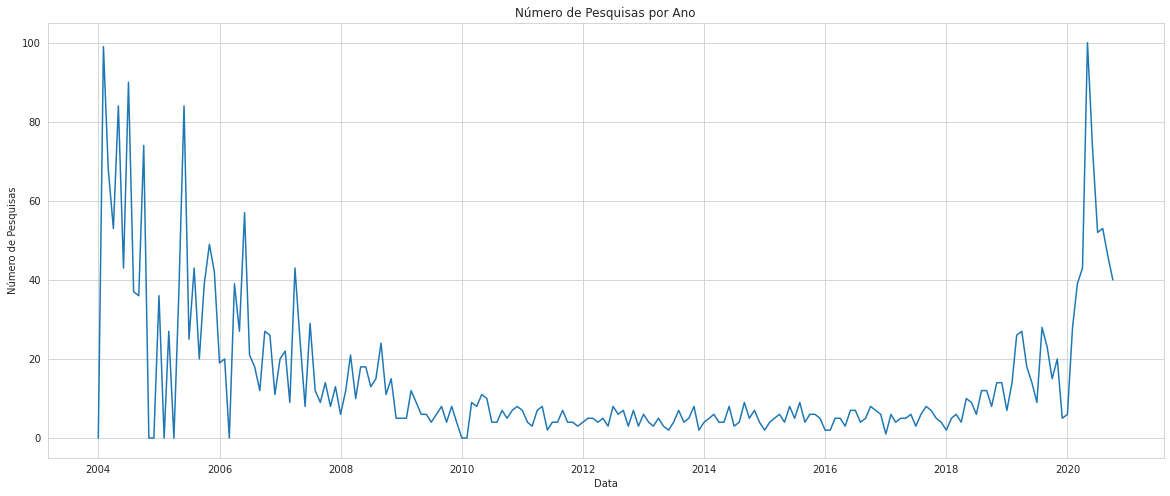

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df['Jogos Eletrônicos'])
plt.grid(True)
plt.title("Número de Pesquisas por Ano")
plt.ylabel("Número de Pesquisas")
plt.xlabel("Data")
plt.show

In [13]:
rq = pytrend.related_queries()

In [14]:
rq.values()

dict_values([{'top':                                                 query  value
0                                   jogos eletronicos    100
1                         o que são jogos eletrônicos     83
2                    benefícios dos jogos eletrônicos     48
3                          tipos de jogos eletrônicos     33
4                      história dos jogos eletrônicos     31
5                        console de jogos eletrônicos     31
6                       exemplos de jogos eletrônicos     25
7                           jogos eletrônicos antigos     19
8                         o que são jogos eletronicos     18
9                    a história dos jogos eletrônicos     14
10      benefícios e malefícios dos jogos eletrônicos     14
11                       origem dos jogos eletrônicos     12
12                     jogos eletrônicos de movimento     10
13             os termos em destaque no texto revelam      9
14                                   mega eletrônicos      7
15 

In [15]:
palavras_chave = pytrend.suggestions (keyword = 'Jogos Eletrônicos') 
df1 = pd.DataFrame (palavras_chave) 
df1.drop (columns = 'mid')

,title,type
0,Video game console,Topic
1,Video game developer,Topic
2,Video game music,Musical style
3,Video game genre,Topic
4,Video game industry,Topic


#Video Game, Youtube

In [16]:
pytrend.build_payload(kw_list=['Video Game'], geo='BR', timeframe='all', gprop='youtube')

In [17]:
dados = pytrend.interest_over_time()

In [18]:
dados.head()

,Video Game,isPartial
date,,
2004-01-01,0,True
2004-02-01,0,True
2004-03-01,0,True
2004-04-01,0,True
2004-05-01,0,True


In [19]:
dados.tail()

,Video Game,isPartial
date,,
2020-06-01,16,False
2020-07-01,16,False
2020-08-01,16,False
2020-09-01,15,False
2020-10-01,12,True


<function matplotlib.pyplot.show>

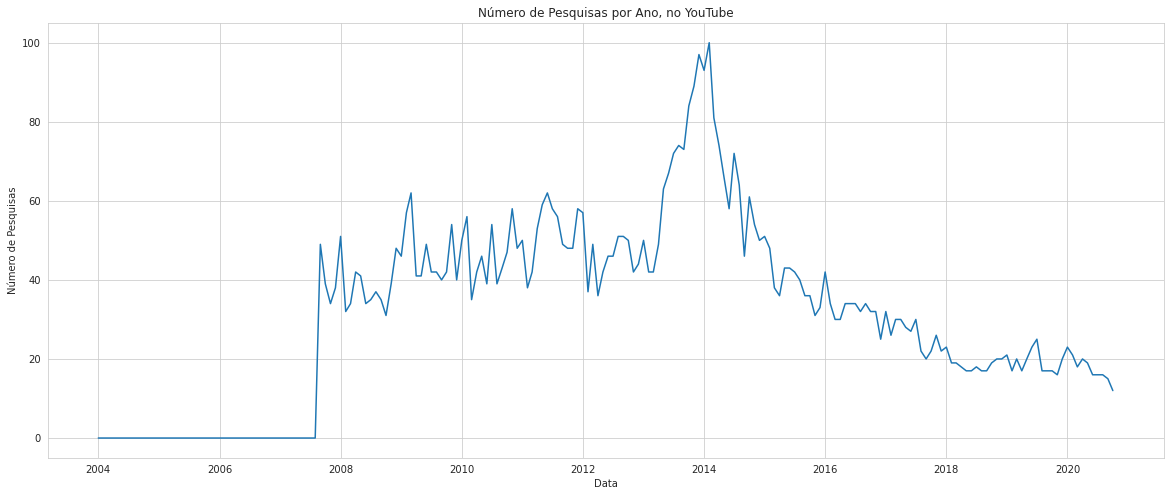

In [20]:
plt.figure(figsize=(20,8))
plt.plot(dados['Video Game'])
plt.grid(True)
plt.title("Número de Pesquisas por Ano, no YouTube")
plt.ylabel("Número de Pesquisas")
plt.xlabel("Data")
plt.show

#Twitch, Buscador

In [21]:
pytrend.build_payload(kw_list=['Twitch'], geo='BR', timeframe='all')

In [22]:
twitch = pytrend.interest_over_time()

In [23]:
twitch.head()

,Twitch,isPartial
date,,
2004-01-01,0,False
2004-02-01,2,False
2004-03-01,0,False
2004-04-01,0,False
2004-05-01,0,False


In [26]:
twitch.tail()

,Twitch,isPartial
date,,
2020-06-01,100,False
2020-07-01,93,False
2020-08-01,98,False
2020-09-01,91,False
2020-10-01,95,True


<function matplotlib.pyplot.show>

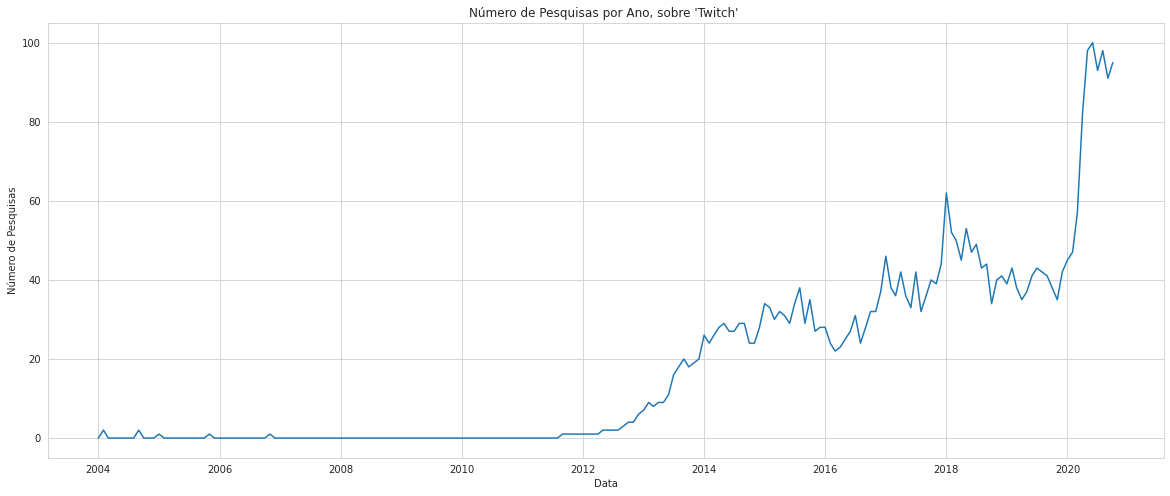

In [25]:
plt.figure(figsize=(20,8))
plt.plot(twitch['Twitch'])
plt.grid(True)
plt.title("Número de Pesquisas por Ano, sobre 'Twitch' ")
plt.ylabel("Número de Pesquisas")
plt.xlabel("Data")
plt.show

In [30]:
 twitch['2020-01-01': '2020-10-01']

,Twitch,isPartial
date,,
2020-01-01,45,False
2020-02-01,47,False
2020-03-01,57,False
2020-04-01,82,False
2020-05-01,98,False
2020-06-01,100,False
2020-07-01,93,False
2020-08-01,98,False
2020-09-01,91,False


In [32]:
twitch.dtypes

Twitch        int64
isPartial    object
dtype: object

In [37]:
twitch.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', name='date', length=202, freq=None)

In [38]:
twitch.index.max()

Timestamp('2020-10-01 00:00:00')

In [39]:
twitch.index.min()

Timestamp('2004-01-01 00:00:00')

In [40]:
twitch_ano = twitch.resample('A').sum()

In [41]:
twitch_ano

,Twitch
date,
2004-12-31,4
2005-12-31,2
2006-12-31,1
2007-12-31,0
2008-12-31,0
2009-12-31,0
2010-12-31,0
2011-12-31,4
2012-12-31,29


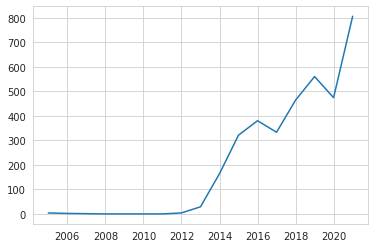

In [42]:
plt.plot(twitch_ano)

In [43]:
twitch_mes = twitch.groupby([lambda x: x.month]).sum()

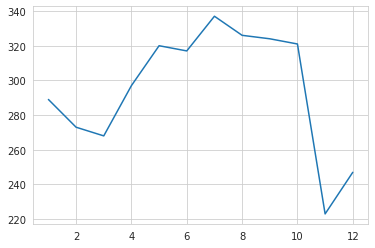

In [44]:
plt.plot(twitch_mes)